In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

In [2]:
def rescale(x):
    return (x - x.mean())/x.std()

In [3]:
gdp_df = pd.read_csv("data\\gdp_france.csv", sep=";")
gdp_df = gdp_df[["TIME","Value"]]
gdp_df.columns=["year_quarter", "gdp_growth" ]
gdp_df["gdp_growth_norm"] = rescale(gdp_df.gdp_growth)
gdp_df.head()

,year_quarter,gdp_growth,gdp_growth_norm
0,2000-Q1,0.947089,0.847136
1,2000-Q2,0.939535,0.837914
2,2000-Q3,0.651971,0.486885
3,2000-Q4,0.810285,0.680139
4,2001-Q1,0.549790,0.362153


### OECD Composite indicator VS GDP (for France)

In [7]:
cli_oecd_df = pd.read_csv("data/composite_oecd.csv",sep=";")

cli_oecd_df["month"] = cli_oecd_df.TIME.apply(lambda time: int(time[-2:]))
cli_oecd_df["year"] = cli_oecd_df.TIME.apply(lambda time: int(time[:4]))

cli_oecd_df["quarter"] = cli_oecd_df["month"].apply(lambda month: np.ceil(month/3)) 

cli_oecd_df.Value = (cli_oecd_df.Value - 100)/100
#cli_oecd_df["Value_norm"] = (cli_oecd_df.Value  - cli_oecd_df.Value.mean())/cli_oecd_df.Value.std()

cli_oecd_norm_quarter = cli_oecd_df.groupby(["year", "quarter"])["Value"].mean().to_frame()
cli_oecd_norm_quarter["cli_norm" ] = rescale(cli_oecd_norm_quarter.Value) 
cli_oecd_norm_quarter["cli_norm_1" ] = cli_oecd_norm_quarter["cli_norm" ].shift(1)
cli_oecd_norm_quarter.head()

Value  cli_norm  cli_norm_1
year quarter                                
2000 1.0      0.019243  1.634576         NaN
     2.0      0.021105  1.787910    1.634576
     3.0      0.021009  1.779978    1.787910
     4.0      0.020113  1.706234    1.779978
2001 1.0      0.016174  1.381949    1.706234

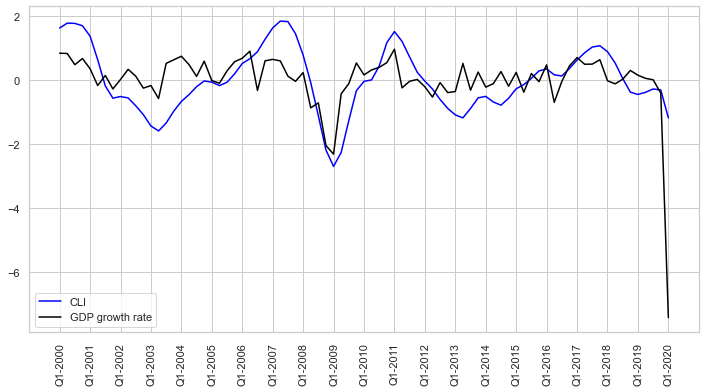

In [13]:
plt.figure( figsize=(12,6) )
#plt.plot(busi_oecd_norm_quarter.busi_norm.values, color="red", label="BCI")
#plt.plot(cons_oecd_norm_quarter.cons_norm.values, color="green", label="CCI")
plt.plot(cli_oecd_norm_quarter.cli_norm.values, color="blue", label="CLI")
plt.plot(gdp_df.gdp_growth_norm.values, color="black", label="GDP growth rate")


plt.xticks( range(0,82, 4), ["Q1-%s"%year for year in range(2000,2021)], rotation='vertical')
plt.legend()
plt.savefig("pics\oecd_indexes.png")
plt.show()

In [14]:
unemp_df = pd.read_csv("data/unemployment_rate.csv", sep=";")
unemp_df.head()

,year_quarter,unemp
0,2000-Q1,10.233330
1,2000-Q2,9.700000
2,2000-Q3,9.266666
3,2000-Q4,8.900000
4,2001-Q1,8.700000


### French unemployment rate

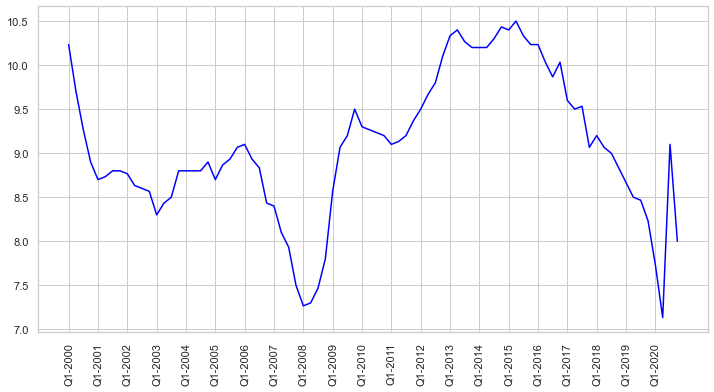

In [15]:
plt.figure( figsize=(12,6) )
#plt.plot(busi_oecd_norm_quarter.busi_norm.values, color="red", label="BCI")
#plt.plot(cons_oecd_norm_quarter.cons_norm.values, color="green", label="CCI")
plt.plot(unemp_df.unemp.values, color="blue")


plt.xticks( range(0,82, 4), ["Q1-%s"%year for year in range(2000,2021)], rotation='vertical')
#plt.legend()
plt.savefig("pics\\unemp.png")
plt.show()